<a href="https://colab.research.google.com/github/annisareida/KlasifikasiPisang/blob/main/BananaClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

# Path folder kelas fresh banana
fresh_banana_dir = '/content/drive/MyDrive/dataset/dataset_tubes_comvis/train/freshbanana'
augmented_dir = '/content/drive/MyDrive/dataset/dataset_tubes_comvis/train/augmentedfreshbanana'

# Buat folder output jika belum ada
os.makedirs(augmented_dir, exist_ok=True)

# Buat objek augmentasi
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Target augmentasi (misal ingin total mendekati jumlah rotten banana: 2234)
target_augmented_images = 2234 - len(os.listdir(fresh_banana_dir))

image_files = os.listdir(fresh_banana_dir)
generated = 0

for img_name in image_files:
    img_path = os.path.join(fresh_banana_dir, img_name)
    img = load_img(img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_dir, save_prefix='aug', save_format='jpg'):
        i += 1
        generated += 1
        if generated >= target_augmented_images:
            break
    if generated >= target_augmented_images:
        break

print(f"Augmentasi selesai: {generated} gambar disimpan ke {augmented_dir}")


Augmentasi selesai: 653 gambar disimpan ke /content/drive/MyDrive/dataset/dataset_tubes_comvis/train/augmentedfreshbanana


In [ ]:
import os
import shutil

# Direktori asal
original_dir = '/content/drive/MyDrive/dataset/dataset_tubes_comvis/train/freshbanana'
augmented_dir = '/content/drive/MyDrive/dataset/dataset_tubes_comvis/train/augmentedfreshbanana'

# Direktori target penggabungan
combined_dir = '/content/drive/MyDrive/dataset/dataset_tubes_comvis/train/freshbanana_combined'
os.makedirs(combined_dir, exist_ok=True)

# Salin file dari folder original
for filename in os.listdir(original_dir):
    src = os.path.join(original_dir, filename)
    dst = os.path.join(combined_dir, filename)
    shutil.copyfile(src, dst)

# Salin file dari folder augmented
for filename in os.listdir(augmented_dir):
    src = os.path.join(augmented_dir, filename)
    dst = os.path.join(combined_dir, filename)
    # Tambahkan awalan untuk menghindari duplikat nama
    if os.path.exists(dst):
        base, ext = os.path.splitext(filename)
        dst = os.path.join(combined_dir, f"{base}_aug{ext}")
    shutil.copyfile(src, dst)

print(f"Sukses menggabungkan ke {combined_dir}. Total file: {len(os.listdir(combined_dir))}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset/dataset_tubes_comvis/train/augmentedfreshbanana/aug_0_302.jpg'

In [ ]:
import os

# Path utama dataset

base_path = '/content/drive/MyDrive/dataset/dataset_tubes_comvis'

# Path folder train dan test
train_dir = os.path.join(base_path, 'train')
test_dir = os.path.join(base_path, 'test')

# Path folder training
train_fresh_dir = os.path.join(train_dir, 'freshbanana_combined')
train_rot_dir   = os.path.join(train_dir, 'rottenbanana')

# Path folder testing
test_fresh_dir = os.path.join(test_dir, 'freshbanana')
test_rot_dir   = os.path.join(test_dir, 'rottenbanana')

# Cek apakah semua direktori valid (opsional)
print("Train Fresh Dir:", os.path.exists(train_fresh_dir))
print("Train Rotten Dir:", os.path.exists(train_rot_dir))
print("Test Fresh Dir:", os.path.exists(test_fresh_dir))
print("Test Rotten Dir:", os.path.exists(test_rot_dir))


Train Fresh Dir: True
Train Rotten Dir: True
Test Fresh Dir: True
Test Rotten Dir: True


In [ ]:
!pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.1 MB/s eta 0:00:00


In [ ]:
# import library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt.data
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing import image
import numpy as np

In [ ]:
# Cek nama file

train_fresh_fnames = os.listdir(train_fresh_dir)
print(train_fresh_fnames[:10])

train_rot_fnames = os.listdir(train_rot_dir)
train_rot_fnames.sort()
print(train_rot_fnames[:10])

['saltandpepper_Screen Shot 2018-06-12 at 9.52.21 PM.png', 'saltandpepper_Screen Shot 2018-06-12 at 9.50.16 PM.png', 'saltandpepper_Screen Shot 2018-06-12 at 9.51.36 PM.png', 'saltandpepper_Screen Shot 2018-06-12 at 9.51.00 PM.png', 'saltandpepper_Screen Shot 2018-06-12 at 9.49.23 PM.png', 'saltandpepper_Screen Shot 2018-06-12 at 9.49.54 PM.png', 'saltandpepper_Screen Shot 2018-06-12 at 9.50.44 PM.png', 'saltandpepper_Screen Shot 2018-06-12 at 9.49.00 PM.png', 'saltandpepper_Screen Shot 2018-06-12 at 9.48.39 PM.png', 'saltandpepper_Screen Shot 2018-06-12 at 9.49.37 PM.png']
['Screen Shot 2018-06-12 at 8.47.14 PM.png', 'Screen Shot 2018-06-12 at 8.47.28 PM.png', 'Screen Shot 2018-06-12 at 8.47.57 PM.png', 'Screen Shot 2018-06-12 at 8.48.07 PM.png', 'Screen Shot 2018-06-12 at 8.48.18 PM.png', 'Screen Shot 2018-06-12 at 8.48.24 PM.png', 'Screen Shot 2018-06-12 at 8.48.32 PM.png', 'Screen Shot 2018-06-12 at 8.48.46 PM.png', 'Screen Shot 2018-06-12 at 8.49.04 PM.png', 'Screen Shot 2018-06-1

In [ ]:
# Menghitung banyak file input

print('total training fresh banana images:', len(os.listdir(train_fresh_dir)))
print('total training rotten banana images:', len(os.listdir(train_rot_dir)))
print('total testing fresh banana images:', len(os.listdir(test_fresh_dir)))
print('total testing rotten banana images:', len(os.listdir(test_rot_dir)))

total training fresh banana images: 2488
total training rotten banana images: 2234
total testing fresh banana images: 381
total testing rotten banana images: 530


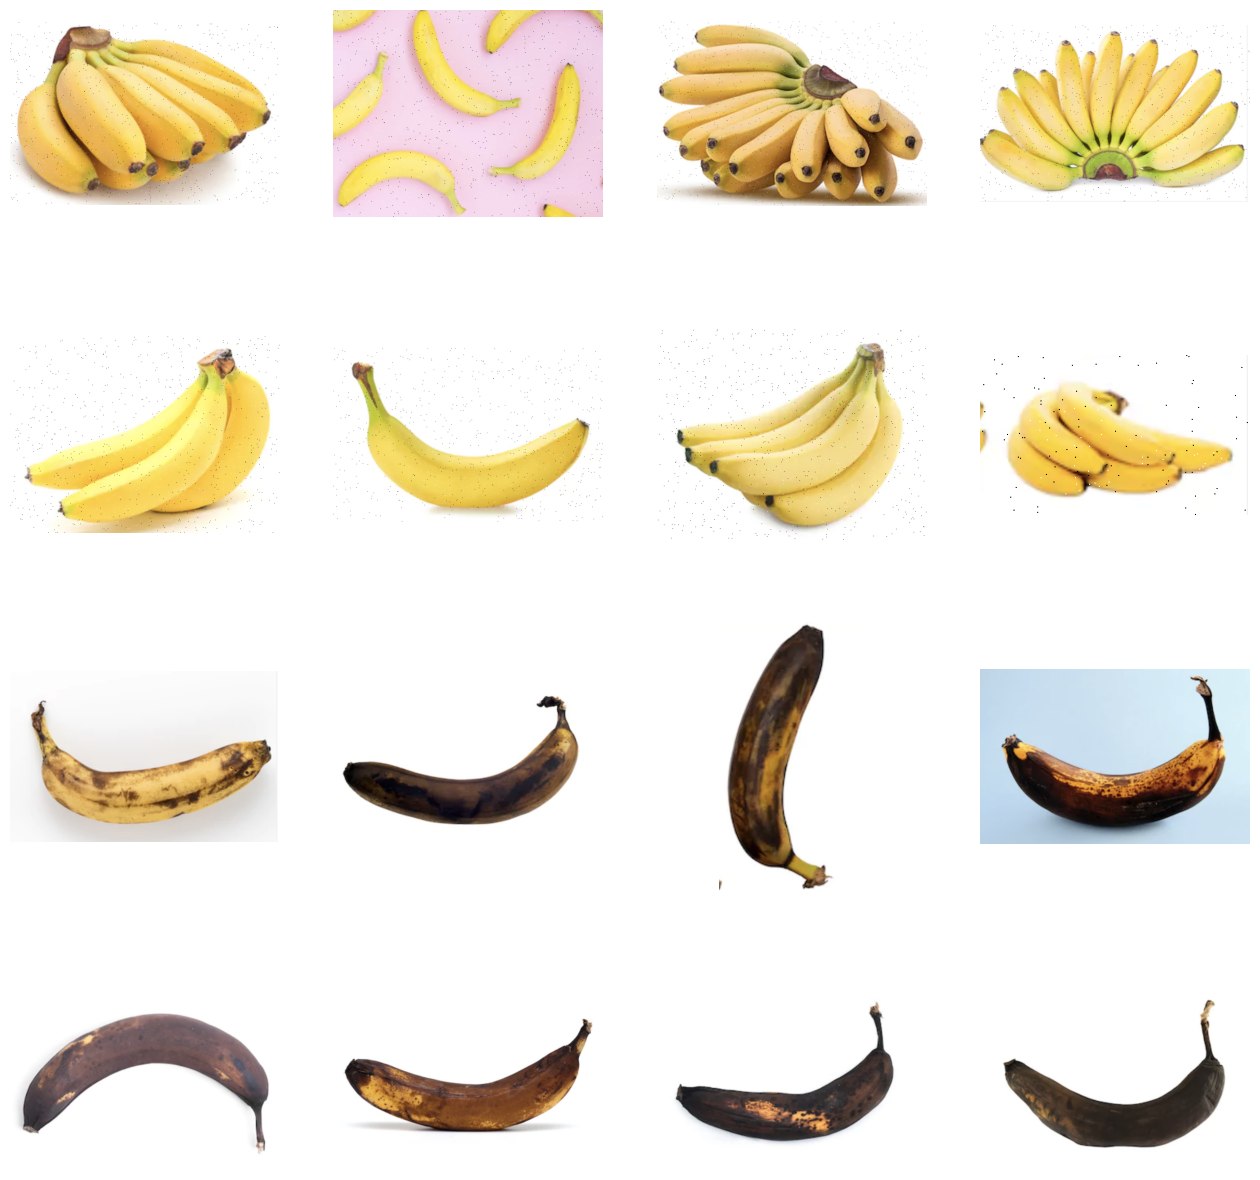

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Menampilkan sampel pisang matang dan pisang busuk
nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_banana_pix = [os.path.join(train_fresh_dir, fname)
                for fname in train_fresh_fnames[pic_index-8:pic_index]]
next_banana_rot_pix = [os.path.join(train_rot_dir, fname)
                for fname in train_rot_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_banana_pix+next_banana_rot_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# DEEP LEARNING ARCHITECTURE

from tensorflow.keras import layers
from tensorflow.keras import Model

# Input berdimensi 150x150px dengan 3 channel untuk Blue, Green, dan Red
img_input = layers.Input(shape=(150, 150, 3))

# Convolution layer I: 16 filter berukuran 3x3
x = layers.Conv2D(32, 3, activation='relu')(img_input)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Convolution layer II: 32 filter berukuran 3x3
x = layers.Conv2D(32, 3, activation='relu')(x)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Convolution layer III: 64 filter berukuran 3x3
x = layers.Conv2D(64, 3, activation='relu')(x)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

# Menggabungkan layer input dan output
model = Model(img_input, output)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,499,617 (36.24 MB)

 Trainable params: 9,499,617 (36.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 4722 images belonging to 2 classes.
Found 911 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=120,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=30,
      verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


120/120 - 184s - 2s/step - acc: 0.8638 - loss: 0.3465 - val_acc: 0.9254 - val_loss: 0.1820
Epoch 2/15
120/120 - 50s - 417ms/step - acc: 0.9699 - loss: 0.0912 - val_acc: 0.9956 - val_loss: 0.0351
Epoch 3/15
120/120 - 170s - 1s/step - acc: 0.9733 - loss: 0.0790 - val_acc: 0.9945 - val_loss: 0.0309
Epoch 4/15
120/120 - 50s - 419ms/step - acc: 0.9877 - loss: 0.0516 - val_acc: 0.9945 - val_loss: 0.0207
Epoch 5/15
120/120 - 173s - 1s/step - acc: 0.9867 - loss: 0.0432 - val_acc: 0.9956 - val_loss: 0.0211
Epoch 6/15
120/120 - 57s - 472ms/step - acc: 0.9754 - loss: 0.0636 - val_acc: 0.9945 - val_loss: 0.0241
Epoch 7/15
120/120 - 205s - 2s/step - acc: 0.9945 - loss: 0.0194 - val_acc: 0.9111 - val_loss: 0.2574
Epoch 8/15
120/120 - 53s - 438ms/step - acc: 0.9888 - loss: 0.0423 - val_acc: 0.9956 - val_loss: 0.0169
Epoch 9/15
120/120 - 169s - 1s/step - acc: 0.9929 - loss: 0.0217 - val_acc: 0.9780 - val_loss: 0.0581
Epoch 10/15
120/120 - 57s - 472ms/step - acc: 0.9933 - loss: 0.0109 - val_acc: 0.9956

Text(0.5, 1.0, 'Training and validation loss')

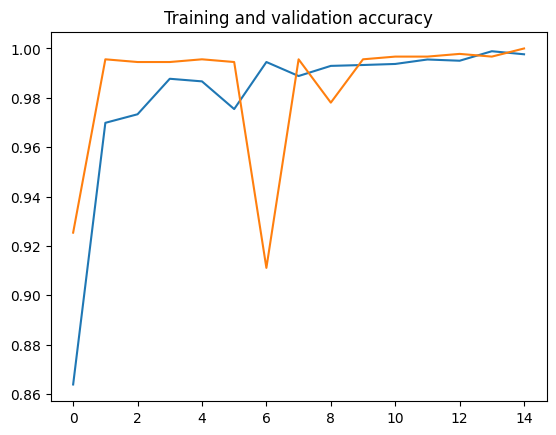

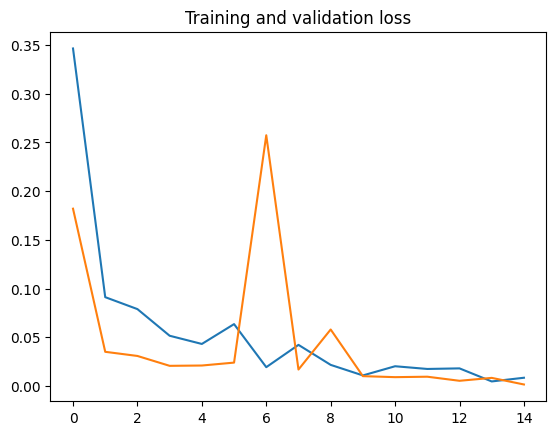

In [ ]:
# VISUALISASI AKURASI PREDIKSI

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

/content/drive/MyDrive/dataset/dataset_tubes_comvis/train/freshbanana_combined/aug_0_321.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


<ipython-input-22-bfbc7fd8872f>:37: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-22-bfbc7fd8872f>:40: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


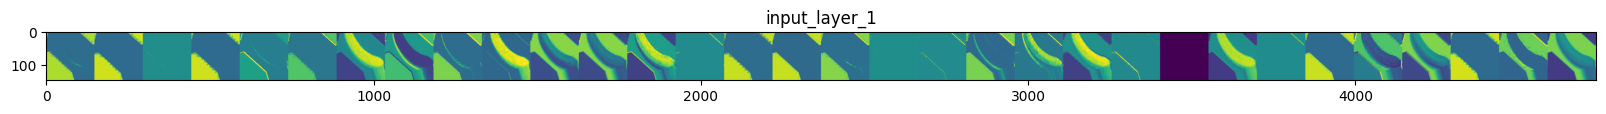

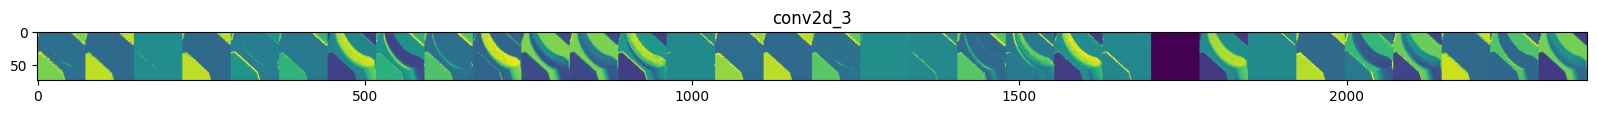

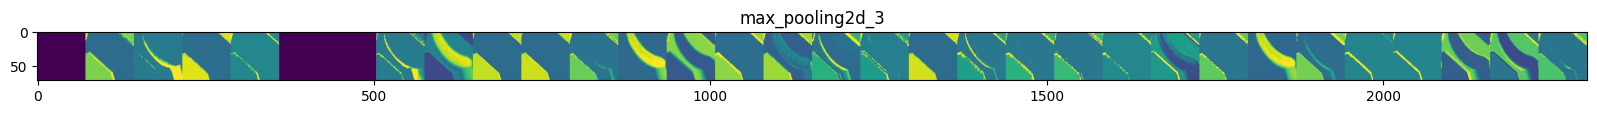

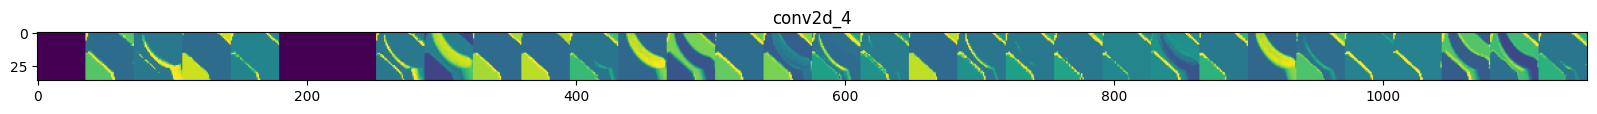

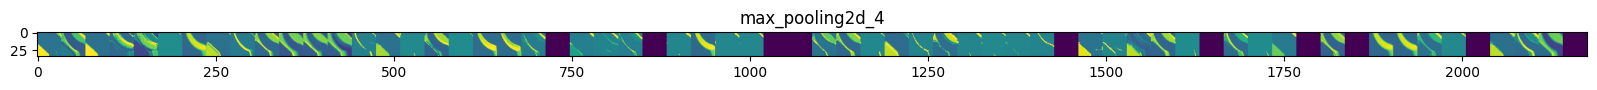

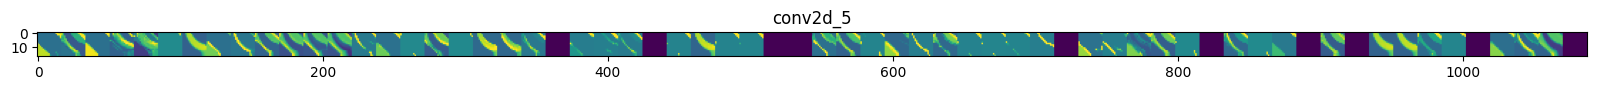

In [ ]:
# DISPLAY FEATURE MAPS

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Mendefinisikan model untuk visualisasi
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Memilih 1 sampel random
fresh_img_files = [os.path.join(train_fresh_dir, f) for f in train_fresh_fnames]
rot_img_files = [os.path.join(train_rot_dir, f) for f in train_rot_fnames]
img_path = random.choice(fresh_img_files + rot_img_files)
print(img_path)

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Rescale 1/255
x /= 255

# Memasukkan image ke model
successive_feature_maps = visualization_model.predict(x)


layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 512ms/step


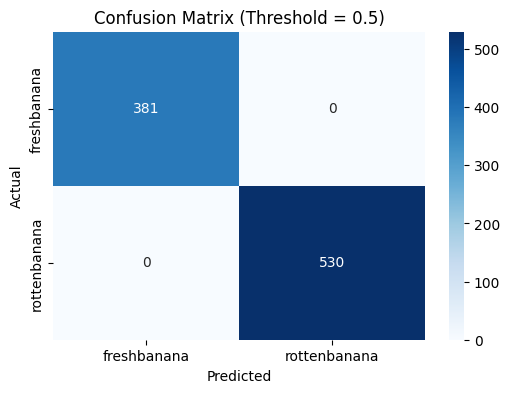

Classification Report:
              precision    recall  f1-score   support

 freshbanana       1.00      1.00      1.00       381
rottenbanana       1.00      1.00      1.00       530

    accuracy                           1.00       911
   macro avg       1.00      1.00      1.00       911
weighted avg       1.00      1.00      1.00       911

Akurasi   : 1.0000
Presisi   : 1.0000
Recall    : 1.0000
F1-score  : 1.0000


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Threshold
threshold = 0.5

# Prediksi pada validation set
pred_probs = model.predict(validation_generator, verbose=1)

# Ambil true labels
true_labels = validation_generator.classes[:len(pred_probs)]

# Ubah ke prediksi kelas berdasarkan threshold
pred_classes = (pred_probs > threshold).astype("int32").flatten()

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_classes)
class_names = list(validation_generator.class_indices.keys())

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()

# Metrik Evaluasi
print("Classification Report:")
print(classification_report(true_labels, pred_classes, target_names=class_names))

print(f"Akurasi   : {accuracy_score(true_labels, pred_classes):.4f}")
print(f"Presisi   : {precision_score(true_labels, pred_classes):.4f}")
print(f"Recall    : {recall_score(true_labels, pred_classes):.4f}")
print(f"F1-score  : {f1_score(true_labels, pred_classes):.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


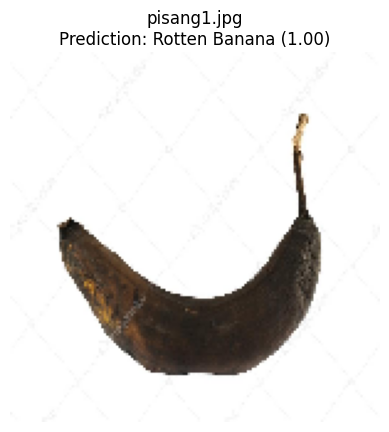

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


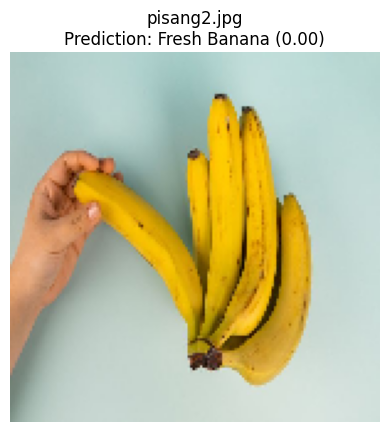

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


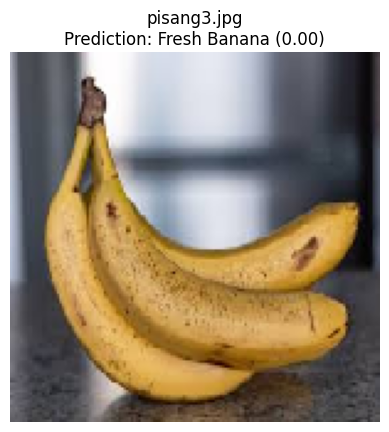

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


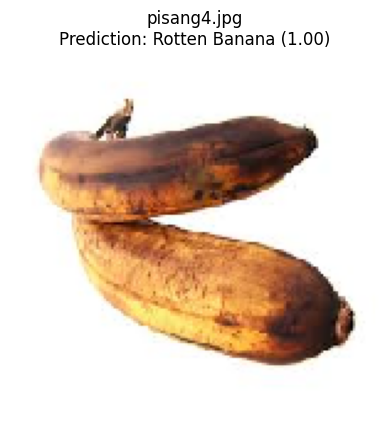

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path ke folder yang berisi gambar-gambar
folder_path = '/content/drive/MyDrive/dataset/pisang'

# Ambil semua nama file gambar
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Ukuran input yang dibutuhkan model
target_size = (150, 150)

# Proses setiap gambar
for file_name in image_files:
    img_path = os.path.join(folder_path, file_name)

    # Load dan preprocess gambar
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.  # Normalisasi

    # Prediksi
    preds = model.predict(x)
    label = "Fresh Banana" if preds[0][0] < 0.5 else "Rotten Banana"
    confidence = preds[0][0]

    # Tampilkan hasil
    plt.imshow(img)
    plt.title(f"{file_name}\nPrediction: {label} ({confidence:.2f})")
    plt.axis('off')
    plt.show()


In [ ]:
model.save("banana_asli.h5")